# Is the likelihood dispersion 'r' unidentifiable?
My recent test of PMCMC with 3 chains did not show any signs of convergence after 130 iterations.
Also, the acceptance rate was extremely low (around 3%). 

It is possible that the parameter $r$ is unidentifiable. This could mean that relatively large changes in $r$ only have small effects on the resulting $\beta$ values and/or the likelihood values. 


### Experiment 1: Max Case Count of 175
The Arizona case counts over the 2023-2024 flu season ranged from 0 to ~175. 

We will generate a negative binomial distribution using the max case count and 2 different $r$ values. 

In [14]:
import numpy as np

# The AZ case counts range from approximately 0 through 175. 
max_case_count = 175
r_vals = [10, 40]
p_vals = [r / (r + max_case_count) for r in r_vals]
x1 = np.random.negative_binomial(n=r_vals[0], p=p_vals[0], size=10000)
x2 = np.random.negative_binomial(n=r_vals[1], p=p_vals[1], size=10000)

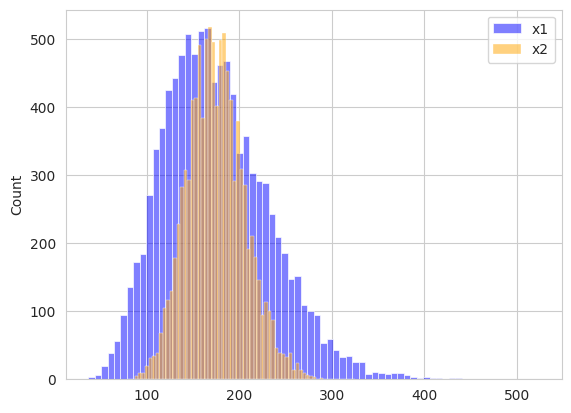

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x = x1, color='blue', alpha=0.5, label='x1')
sns.histplot(x = x2, color='orange', alpha=0.5, label='x2')
plt.legend()
plt.show()

In [16]:
x1.sort()
x2.sort()
lower_min_avg_x1 = x1[0:50].mean()
lower_min_avg_x2 = x2[0:50].mean()

upper_max_avg_x1 = x1[9950:].mean()
upper_max_avg_x2 = x2[9950:].mean()

print("Min difference between x1 and x2 is {}".format(lower_min_avg_x1 - lower_min_avg_x2))
print("Max difference between x1 and x2 is {}".format(upper_max_avg_x1 - upper_max_avg_x2))

Min difference between x1 and x2 is -42.76
Max difference between x1 and x2 is 120.5


Notice the difference in max and min values for the distributions. 

### Experiment 2: Lower Case Counts
The average case is much more common than the maximum case. And many states will have lower populations and, therefore, lower case counts. 


In [17]:
import numpy as np

# The AZ case counts range from approximately 0 through 175. 
max_case_count = 20
r_vals = [1, 4]
p_vals = [r / (r + max_case_count) for r in r_vals]
x1 = np.random.negative_binomial(n=r_vals[0], p=p_vals[0], size=10000)
x2 = np.random.negative_binomial(n=r_vals[1], p=p_vals[1], size=10000)

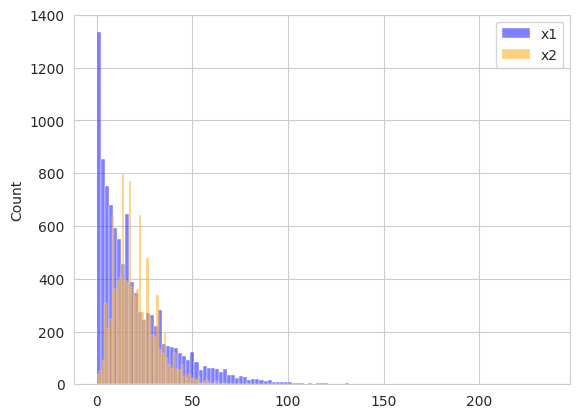

In [18]:
sns.histplot(x = x1, color='blue', alpha=0.5, label='x1')
sns.histplot(x = x2, color='orange', alpha=0.5, label='x2')
plt.legend()
plt.show()

In [51]:
x1.sort()
x2.sort()
lower_min_avg_x1 = x1[0:50].mean()
lower_min_avg_x2 = x2[0:50].mean()

upper_max_avg_x1 = x1[9950:].mean()
upper_max_avg_x2 = x2[9950:].mean()

print("Min difference between x1 and x2 is {}".format(lower_min_avg_x1 - lower_min_avg_x2))
print("Max difference between x1 and x2 is {}".format(upper_max_avg_x1 - upper_max_avg_x2))

Min difference between x1 and x2 is -3.5
Max difference between x1 and x2 is 11.96


## Experiment 3: Synthetic Data
Our recent tests on synthetic data were successful. 
However, case reports ranged from 0-1200+. 


In [6]:
import numpy as np

max_case_count = 1200
r_vals = [10, 40]
p_vals = [r / (r + max_case_count) for r in r_vals]
x1 = np.random.negative_binomial(n=r_vals[0], p=p_vals[0], size=10000)
x2 = np.random.negative_binomial(n=r_vals[1], p=p_vals[1], size=10000)

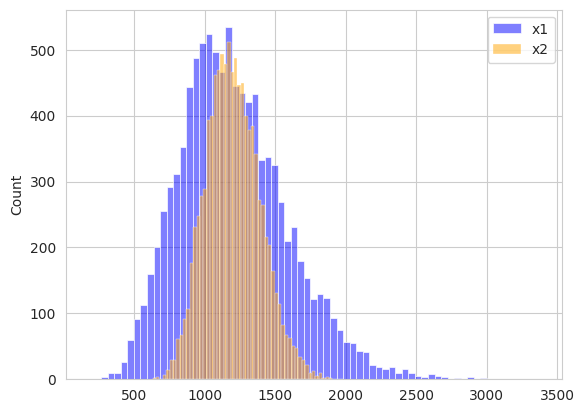

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x = x1, color='blue', alpha=0.5, label='x1')
sns.histplot(x = x2, color='orange', alpha=0.5, label='x2')
plt.legend()
plt.show()

In [45]:
x1.sort()
x2.sort()
lower_min_avg_x1 = x1[0:50].mean()
lower_min_avg_x2 = x2[0:50].mean()

upper_max_avg_x1 = x1[9950:].mean()
upper_max_avg_x2 = x2[9950:].mean()

print("Difference in min values between x1 and x2 is {}".format(lower_min_avg_x1 - lower_min_avg_x2))
print("Difference in max values between x1 and x2 is {}".format(upper_max_avg_x1 - upper_max_avg_x2))

Min difference between x1 and x2 is -368.12
Max difference between x1 and x2 is 792.6999999999998


The $r$ parameter is more identifiable when case counts are high. 
The distribution seems to have less variation when case counts are low.
So, small changes in an $r$ value might not have much of an effect on the resulting beta and likleihood estimation.

## Possible Solution
We go back to Gaussian Likelihood and use MCMC to estimate the [Coefficient of Variation](https://en.wikipedia.org/wiki/Coefficient_of_variation) as an estimate for variance. 